Handwritten digits classification using neural network

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves.




In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)


60000

In [ ]:
len(X_test)


10000

In [ ]:
X_train[0].shape


(28, 28)

In [ ]:
X_train[2]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

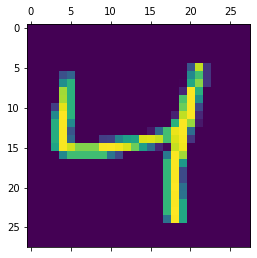

In [ ]:
plt.matshow(X_train[2])


In [ ]:
y_train[2]


4

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_flat= X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flat.shape

(60000, 784)

In [ ]:
X_train_flat[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7155 - accuracy: 0.8125
Epoch 2/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9163
Epoch 3/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2897 - accuracy: 0.9198
Epoch 4/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2745 - accuracy: 0.9226


In [ ]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 0s 936us/step - loss: 0.2691 - accuracy: 0.9254


[0.2691340446472168, 0.9254000186920166]

In [ ]:
y_predicted = model.predict(X_test_flat)
y_predicted[0]

array([2.7018726e-02, 1.0385479e-06, 8.2606107e-02, 9.4292986e-01,
       4.2659342e-03, 9.2851698e-02, 6.0980783e-06, 9.9983215e-01,
       9.5976323e-02, 6.9850743e-01], dtype=float32)

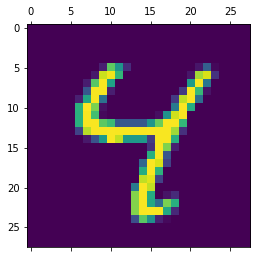

In [ ]:
plt.matshow(X_test[6])

np.argmax finds a maximum element from an array and returns the index of it



In [ ]:
np.argmax(y_predicted[1])

2

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
conmat = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
conmat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    4,    9,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,   10,  926,   18,    9,    2,   13,   11,   32,    5],
       [   1,    0,   21,  930,    0,   19,    3,   12,   16,    8],
       [   1,    1,    2,    1,  923,    0,   12,    3,    7,   32],
       [  10,    4,    3,   39,   11,  755,   23,    9,   29,    9],
       [   7,    3,    5,    1,    8,    7,  924,    2,    1,    0],
       [   1,    6,   23,    6,    6,    0,    0,  962,    1,   23],
       [   8,   12,    9,   28,    8,   27,   11,   13,  848,   10],
       [  10,    7,    2,   11,   31,    6,    0,   29,    5,  908]],
      dtype=int32)>

Text(87.0, 0.5, 'Actual')

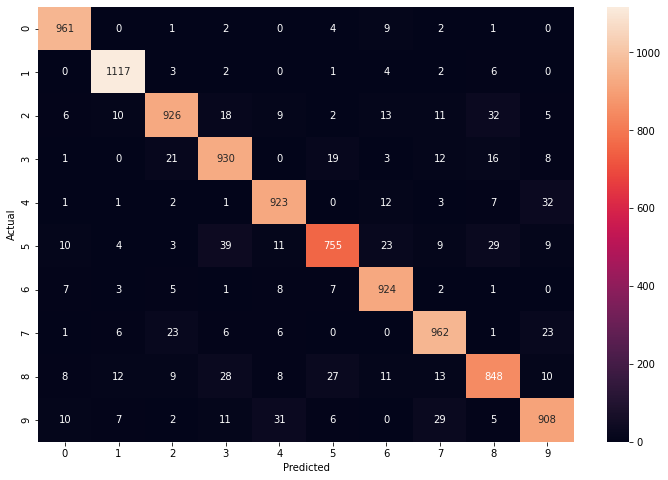

In [ ]:
import seaborn as sn
plt.figure(figsize = (12,8))
sn.heatmap(conmat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Using Hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, y_train, epochs=6)


Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4419 - accuracy: 0.8758
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1283 - accuracy: 0.9626
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0864 - accuracy: 0.9734
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0634 - accuracy: 0.9809
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0478 - accuracy: 0.9854
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0374 - accuracy: 0.9893


In [ ]:
model.evaluate(X_test_flat,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9741


[0.08777204155921936, 0.9740999937057495]

Text(87.0, 0.5, 'Actual')

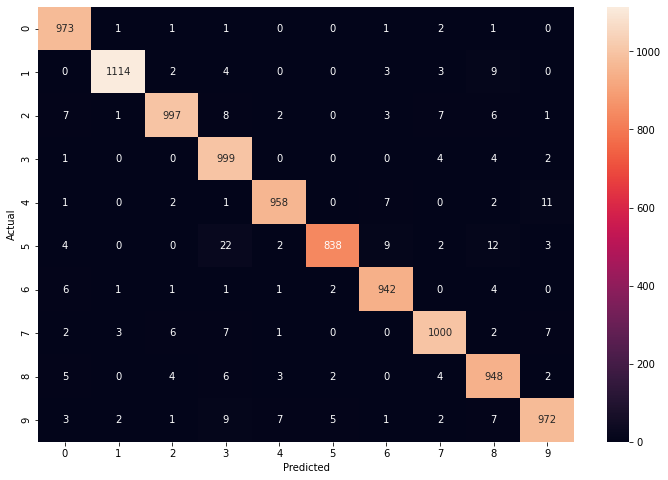

In [ ]:
y_predicted = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
conmat = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (12,8))
sn.heatmap(conmat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Using Flatten layer so that we don't have to call .reshape on input dataset


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4605 - accuracy: 0.8702
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1313 - accuracy: 0.9609
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0871 - accuracy: 0.9749
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0618 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0498 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0370 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0260 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0214 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.017

Here at the end of epoch 10 we got the accuracy as 99.4% which says this is a best model

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0857 - accuracy: 0.9761


[0.08569290488958359, 0.9761000275611877]

After the model evaluation the accuracy is 97.6% and says it us best model